In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1. loading data

In [3]:
battery_df = pd.read_csv("Battery_RUL.csv")
print(battery_df.shape)
battery_df.head()


(15064, 9)


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


# 2. data description
- 2.8Ah NMC-LCO 18650 battery * 14ea
- cycling test over 1000 times at 25°C with 0.5C charge and 1.5C discharge rate
- Cycle Index: number of cycle
- Discharge Time (s)
- Decrement 3.6-3.4V (s)
- Max. Voltage Discharge (V)
- Min. Voltage Charge (V)
- Time at 4.15V (s)
- Time Constant Current (s)
- Charging Time (s)
- RUL: Remaining Useful Time, Target
ref https://github.com/ignavinuales/Battery_RUL_Prediction?tab=readme-ov-file

In [4]:
battery_df.info()
# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [5]:
battery_df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


# 3. EDA

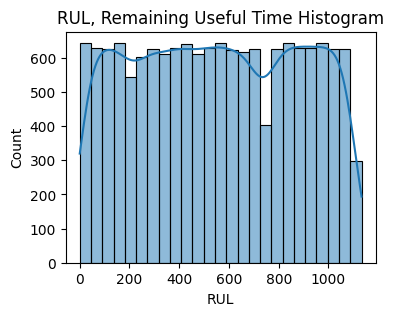

In [6]:
plt.figure(figsize=(4, 3))
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(battery_df.RUL, kde=True)
plt.show()
# it is not a normal distribution.

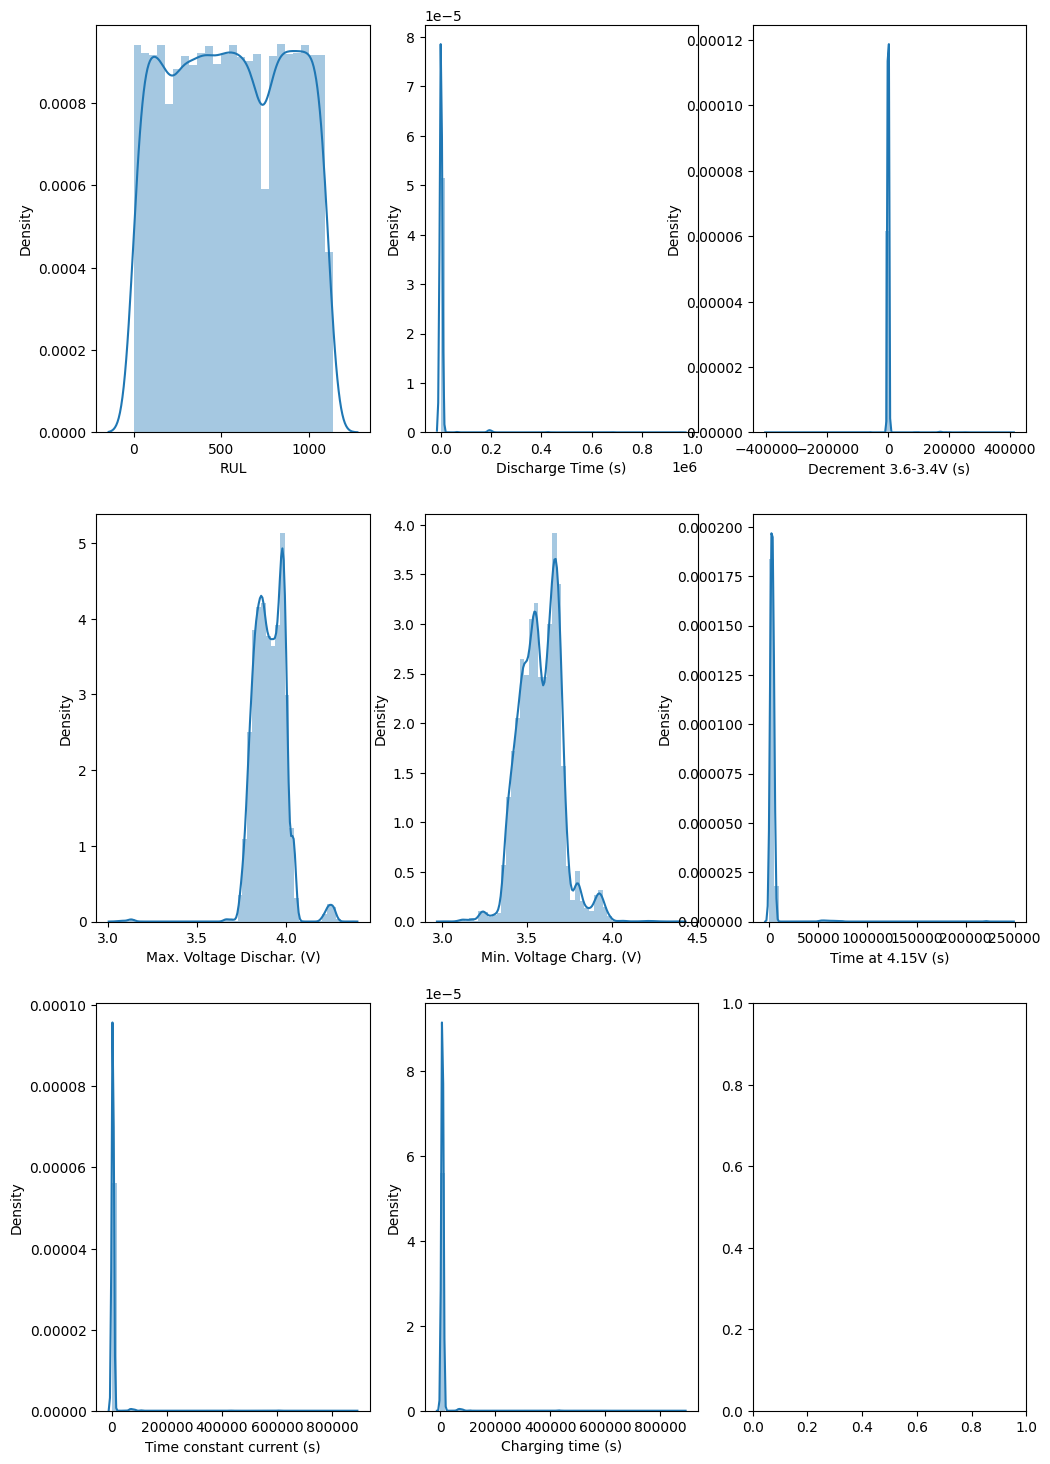

In [7]:
# data distribution

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(12, 18))

sns.distplot(battery_df['RUL'], ax=ax[0, 0]) # target
sns.distplot(battery_df['Discharge Time (s)'], ax=ax[0, 1])
sns.distplot(battery_df['Decrement 3.6-3.4V (s)'], ax=ax[0, 2])
sns.distplot(battery_df['Max. Voltage Dischar. (V)'], ax=ax[1, 0])
sns.distplot(battery_df['Min. Voltage Charg. (V)'], ax=ax[1, 1])
sns.distplot(battery_df['Time at 4.15V (s)'], ax=ax[1, 2])
sns.distplot(battery_df['Time constant current (s)'], ax=ax[2, 0])
sns.distplot(battery_df['Charging time (s)'], ax=ax[2, 1])
plt.show()

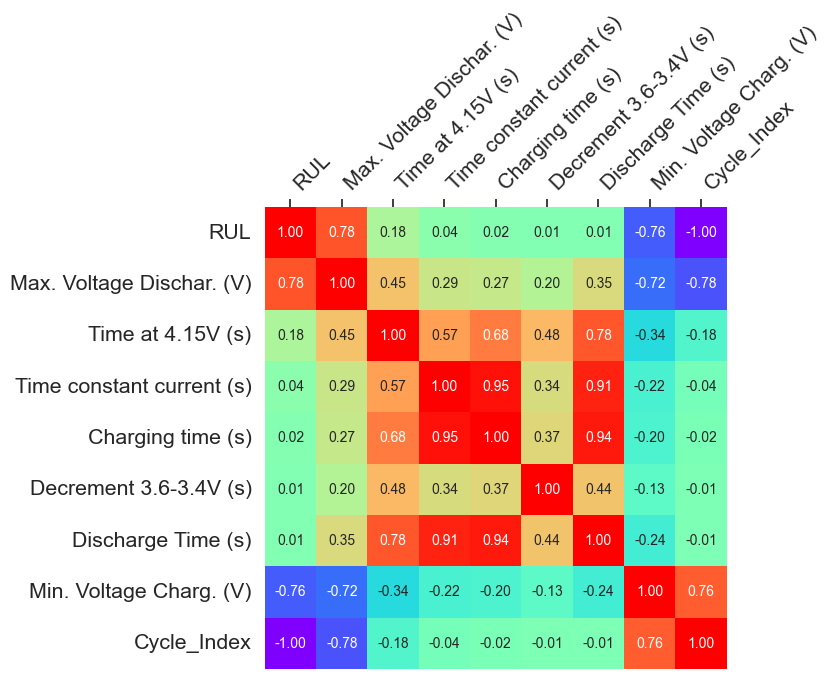

In [8]:
# correlation

corrmat = battery_df.corr()
plt.figure(figsize=(6, 6))
k=9
cols = corrmat.nlargest(k, 'RUL')['RUL'].index
cm = np.corrcoef(battery_df[cols].values.T)
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="rainbow")
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

<Figure size 3000x3000 with 0 Axes>

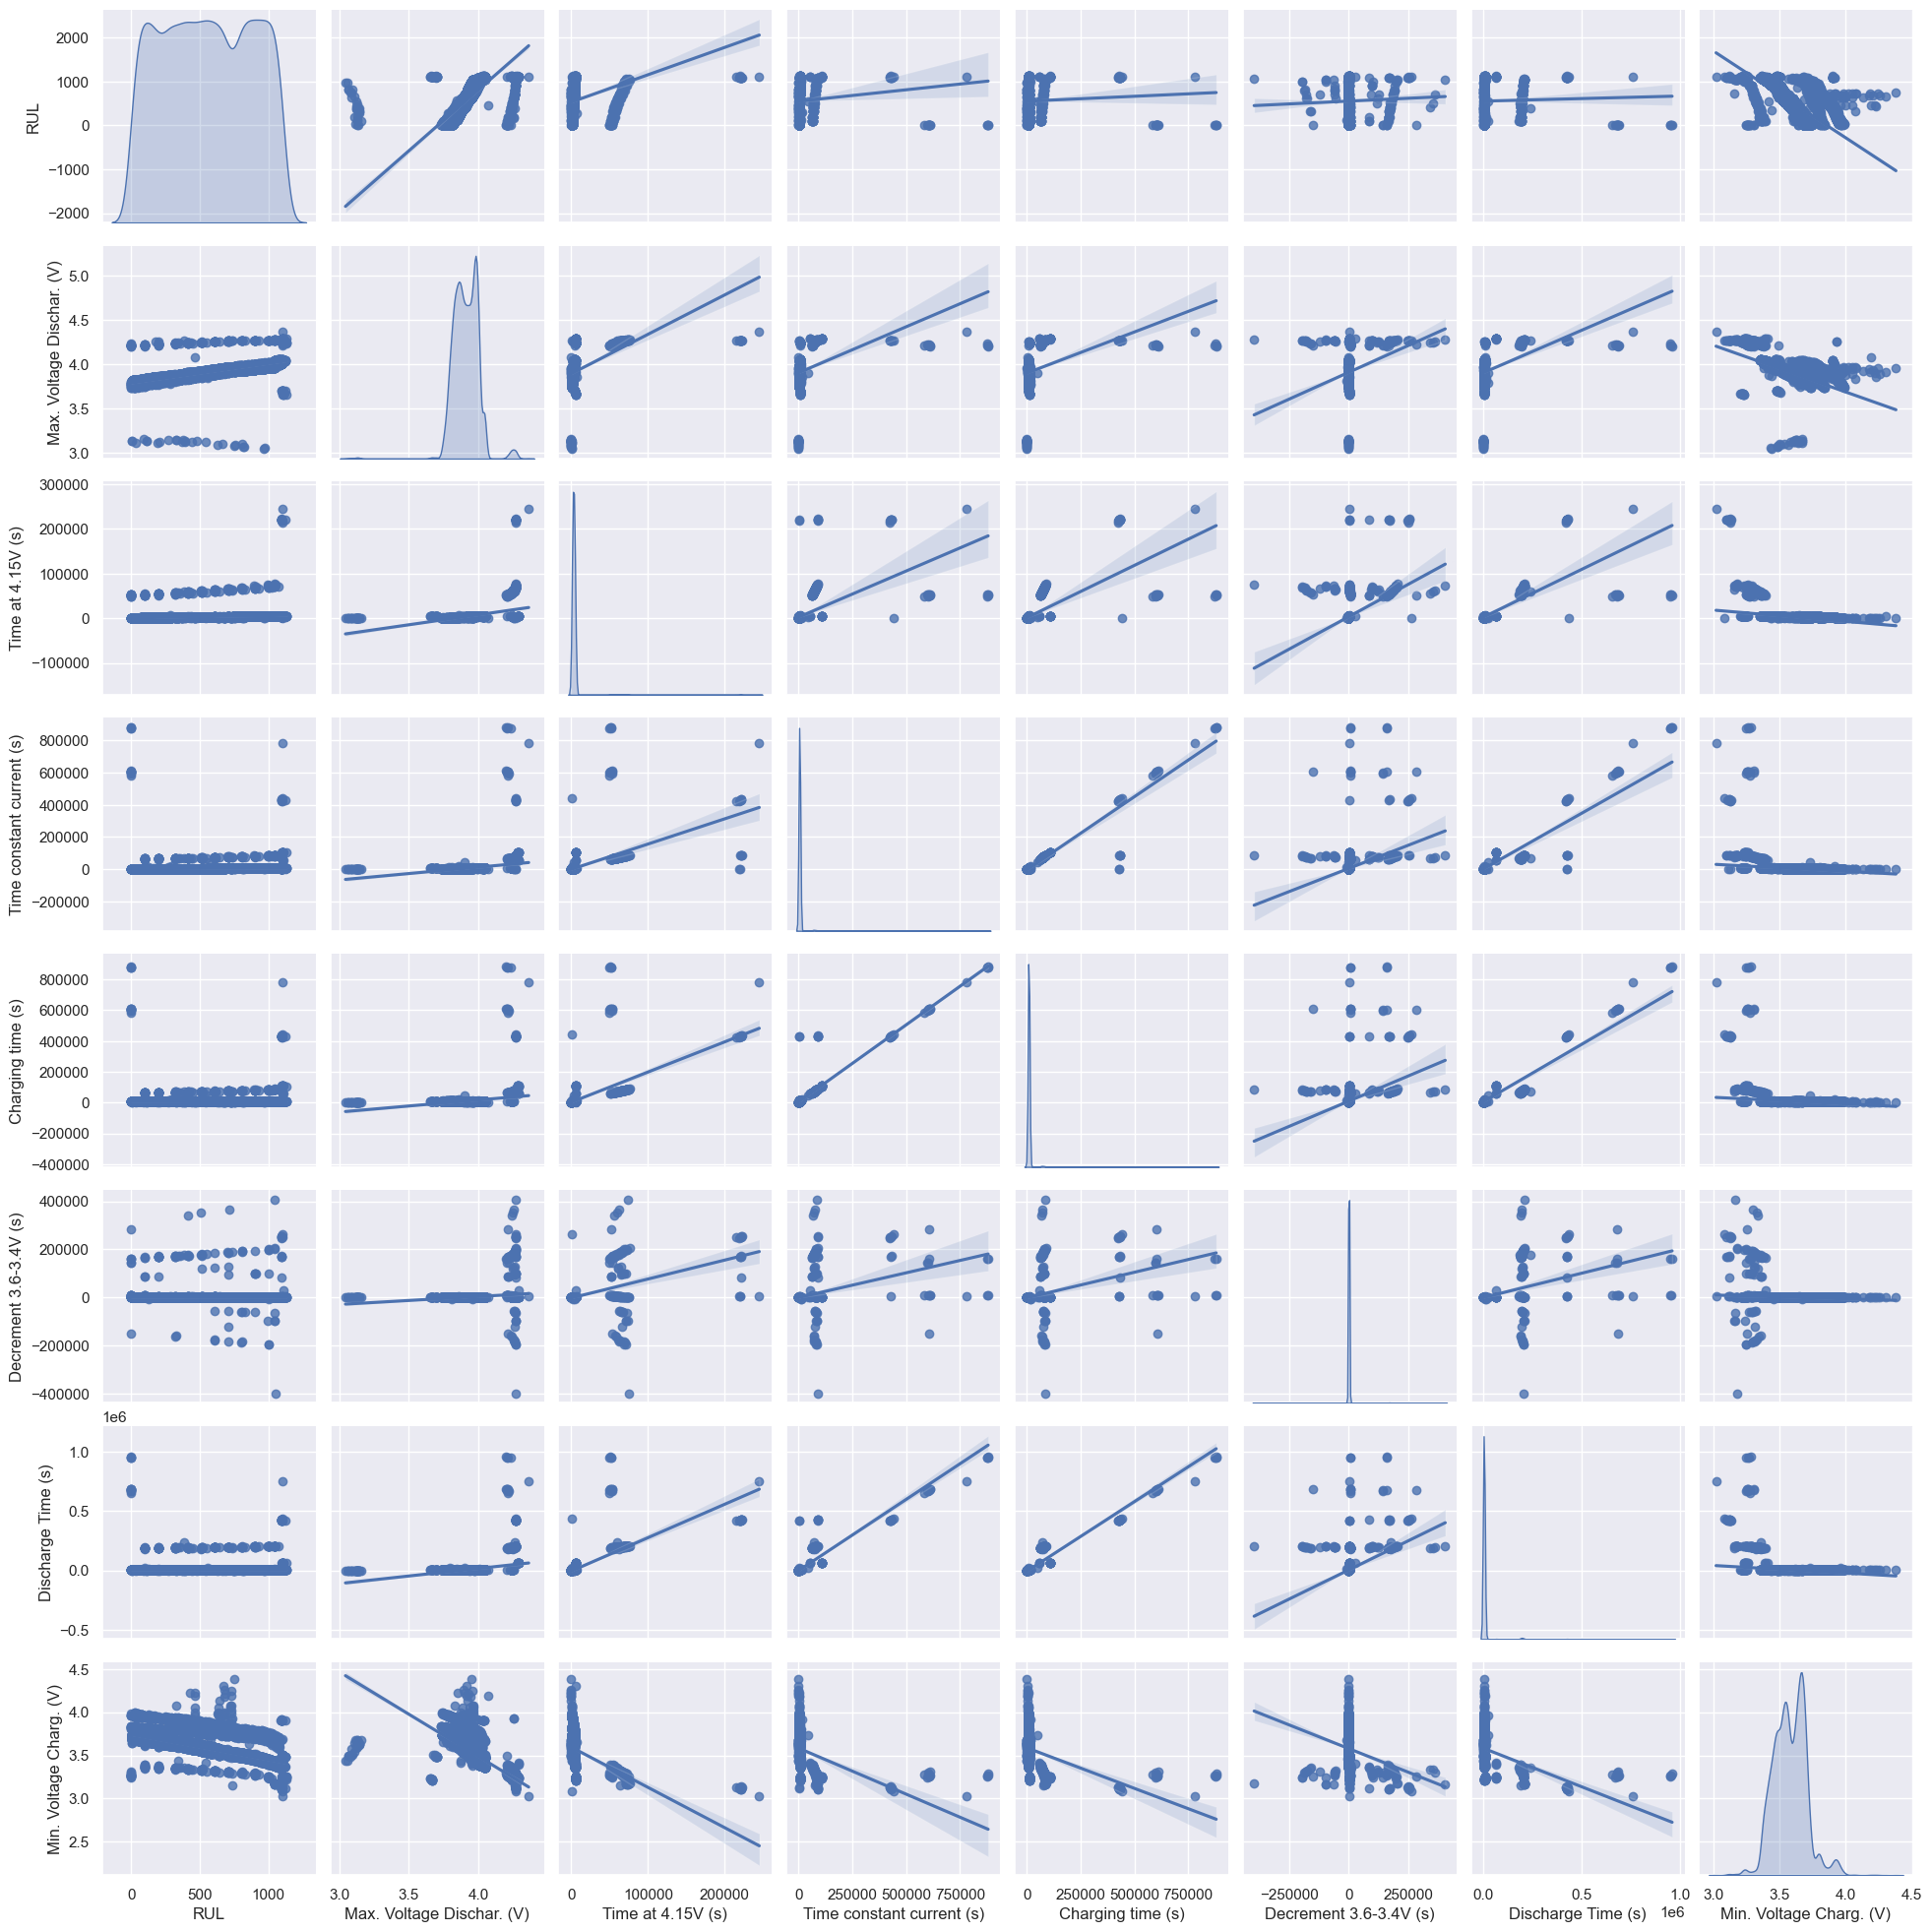

In [9]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.0)
sns.pairplot(battery_df[['RUL', 'Max. Voltage Dischar. (V)', 'Time at 4.15V (s)', 
                         'Time constant current (s)', 'Charging time (s)', 'Decrement 3.6-3.4V (s)', 
                         'Discharge Time (s)', 'Min. Voltage Charg. (V)']], 
             diag_kind='kde', kind='reg')
plt.show()

In [10]:
# interactive graph
# pip install plotly

In [11]:
# import plotly, interactive graph
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

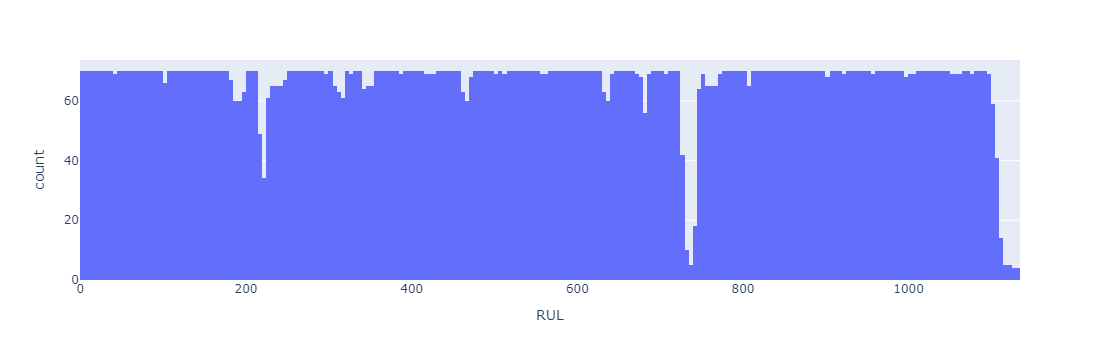

In [12]:
# interactive histogram of RUL

import plotly.express as px
fig = px.histogram(data_frame = battery_df, x="RUL", nbins=240)
fig.show()
# 1st node 220~224 -> 222, 2nd node 735~739 -> 737

In [13]:
# divide the whole data to make a normal dist.
battery_1st = battery_df[(battery_df['RUL']<=222)]
battery_2nd = battery_df[(battery_df['RUL']>222)&(battery_df['RUL']<=737)]
battery_3rd = battery_df[(battery_df['RUL']>737)]
print(battery_1st.shape, battery_2nd.shape, battery_3rd.shape)
battery_1st.describe()

(3036, 9) (6947, 9) (5081, 9)


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,1001.913373,6045.384908,1297.868078,3.810222,3.696861,2079.119175,5715.606252,11210.491970,108.423254
std,63.594593,54431.111204,13495.752270,0.064943,0.074241,5804.785460,47091.525520,46671.862368,63.190398
min,882.000000,30.790000,-149011.834000,3.109000,3.246000,96.257000,8.000000,8.000000,0.000000
25%,948.000000,936.000000,242.940125,3.789000,3.669000,1242.652964,1844.380000,7369.230000,54.000000
50%,1002.000000,1009.820000,269.842857,3.809000,3.688000,1425.875000,2060.390000,7604.310000,108.000000
75%,1057.000000,1081.495000,294.685714,3.828000,3.706000,1620.323536,2276.390000,7824.450000,162.250000
max,1134.000000,958320.370000,283252.125000,4.255000,3.991000,56580.004000,880728.100000,880728.100000,222.000000


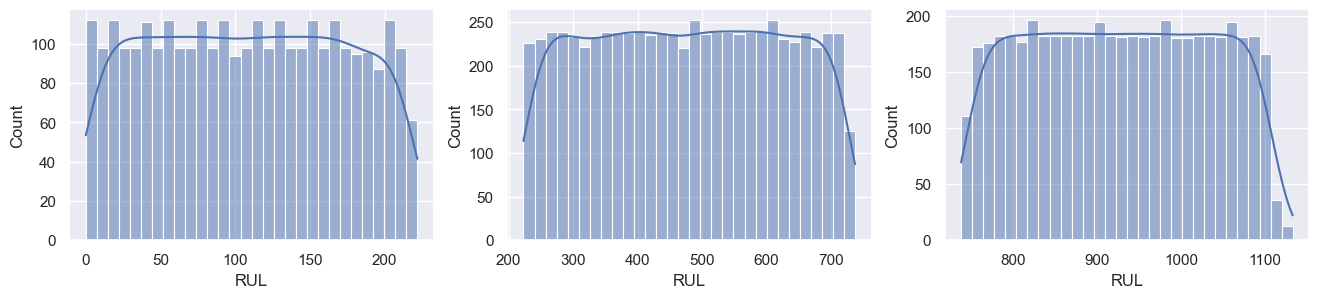

In [17]:
fig, ax = plt.subplots(ncols=3,figsize=(16, 3))

sns.histplot(battery_1st.RUL, kde=True, bins=30, ax=ax[0])
sns.histplot(battery_2nd.RUL, kde=True, bins=30, ax=ax[1])
sns.histplot(battery_3rd.RUL, kde=True, bins=30, ax=ax[2])

plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

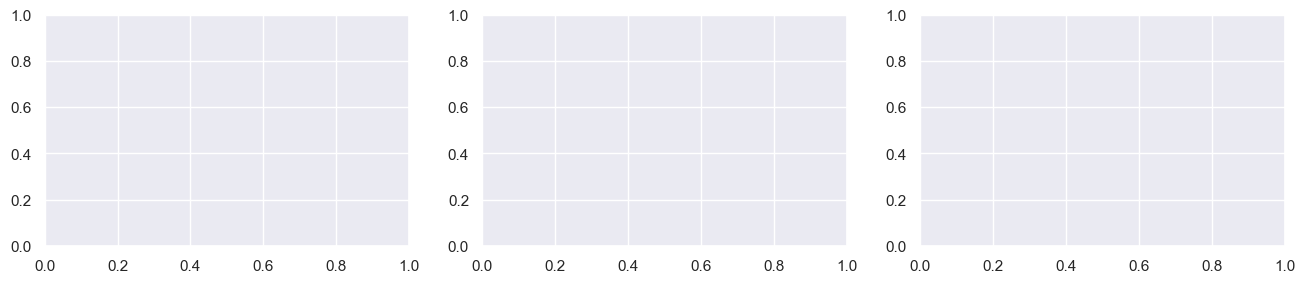

In [18]:
fig, ax = plt.subplots(ncols=3,figsize=(16, 3))

sns.regplot(battery_1st["RUL"], battery_1st['Max. Voltage Dischar. (V)'], ax=ax[0])
sns.regplot(battery_2nd["RUL"], battery_2nd['Max. Voltage Dischar. (V)'], ax=ax[1])
sns.regplot(battery_3rd["RUL"], battery_3rd['Max. Voltage Dischar. (V)'], ax=ax[2])
plt.show()

# 4. modeling with whole data

In [19]:
target = battery_df['RUL']
feature = battery_df.drop(['RUL', 'Cycle_Index'], axis=1)

target.shape, feature.shape

((15064,), (15064, 7))

In [20]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_std = scaler.fit_transform(feature)

feature_std = pd.DataFrame(feature_std, columns = feature.columns)
feature_std.head()

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,-0.059922,-0.005871,-2.617313,-2.966302,0.185302,0.051431,0.026929
1,0.085308,-0.004473,3.712333,-2.893540,0.190668,0.051710,0.016425
2,0.084859,-0.008431,3.745300,-2.861201,0.190668,0.051710,0.013397
3,0.084610,-0.010603,3.756289,-2.853117,0.189904,0.051710,0.009704
4,1.823662,1.899962,4.195847,-1.454466,0.187601,1.898321,1.765439


In [21]:
# split into train and test data
from sklearn.model_selection import (train_test_split, StratifiedKFold)
X_train, X_test, y_train, y_test = train_test_split(feature_std, target, test_size=0.2, random_state=2404)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12051, 7), (3013, 7), (12051,), (3013,))

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])
pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [24]:
def prepare_model(algorithm, X_train, y_train): 
    model = Pipeline(steps=[('preprocessing', pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [28]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), SGDRegressor(), KNeighborsRegressor()]

In [29]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

# Regression Results in Algorithms
#   Algorithm	                 MSE	    RMSE	    Time
# 0	RandomForestRegressor	     538.368288	23.202765	6.218842
# 3	BaggingRegressor	         611.349974	24.725492	0.624315
# 5	DecisionTreeRegressor	     955.865002	30.917067	0.103306
# 6	ExtraTreeRegressor	         960.425241	30.990728	0.033131
# 9	KNeighborsRegressor	        1287.032924	35.875241	0.110578
# 2	GradientBoostingRegressor	2036.129743	45.123494	2.246836
# 1	AdaBoostRegressor	        5109.004892	71.477303	0.959565
# 4	SVR	                       10621.652715 103.061403	11.036764
# 7	LinearRegression	       19248.315344	138.738298	0.023962
# 8	SGDRegressor	           20069.864748	141.668150	0.051851

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,RandomForestRegressor,514.090997,22.673575,7.489939
3,BaggingRegressor,594.590392,24.384224,0.758560
5,DecisionTreeRegressor,1054.676070,32.475777,0.094865
6,ExtraTreeRegressor,1236.577995,35.165011,0.031234
9,KNeighborsRegressor,1287.034238,35.875259,0.046862
2,GradientBoostingRegressor,2036.540180,45.128042,2.387397
1,AdaBoostRegressor,4184.919172,64.690951,0.834109
4,SVR,10621.652715,103.061403,8.949991
7,LinearRegression,19248.315344,138.738298,0.015624
8,SGDRegressor,19266.888863,138.805219,0.015584


# 5. modeling with divided data

In [30]:
target_1st = battery_1st['RUL']
feature_1st = battery_1st.drop(['RUL', 'Cycle_Index'], axis=1)

target_2nd = battery_2nd['RUL']
feature_2nd = battery_2nd.drop(['RUL', 'Cycle_Index'], axis=1)

target_3rd = battery_3rd['RUL']
feature_3rd = battery_3rd.drop(['RUL', 'Cycle_Index'], axis=1)

(target_1st.shape, feature_1st.shape, target_2nd.shape, feature_2nd.shape, 
target_3rd.shape, feature_3rd.shape)

((3036,), (3036, 7), (6947,), (6947, 7), (5081,), (5081, 7))

In [31]:
# standardization

feature_1st_std = scaler.fit_transform(feature_1st)
feature_1st_std = pd.DataFrame(feature_1st_std, columns = feature_1st.columns)

feature_2nd_std = scaler.fit_transform(feature_2nd)
feature_2nd_std = pd.DataFrame(feature_2nd_std, columns = feature_2nd.columns)

feature_3rd_std = scaler.fit_transform(feature_3rd)
feature_3rd_std = pd.DataFrame(feature_3rd_std, columns = feature_3rd.columns)

feature_1st_std.head()

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,-0.089999,-0.072677,0.720409,-0.469647,-0.051981,-0.068459,-0.076755
1,-0.090000,-0.072618,0.720409,-0.469647,-0.050794,-0.068459,-0.080145
2,-0.090041,-0.072745,0.735810,-0.469647,-0.051083,-0.068458,-0.080707
3,-0.090134,-0.072815,0.720409,-0.469647,-0.052862,-0.068459,-0.081786
4,-0.090140,-0.072766,0.735810,-0.442703,-0.055531,-0.068460,-0.081993


In [32]:
# 1. train_1st and test_1st data

X_train_1st, X_test_1st, y_train_1st, y_test_1st = train_test_split(feature_1st_std, target_1st, 
                                                                    test_size=0.2, random_state=2404)
X_train_1st.shape, X_test_1st.shape, y_train_1st.shape, y_test_1st.shape

((2428, 7), (608, 7), (2428,), (608,))

In [33]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train_1st, y_train_1st)
    pred_1st = model.predict(X_test_1st)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test_1st, pred_1st))
    rmse.append(np.sqrt(mean_squared_error(y_test_1st, pred_1st)))

print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

# Regression Results in Algorithms
#   Algorithm	                MSE	        RMSE	    Time
# 0	RandomForestRegressor	    345.004081	18.574285	1.172915
# 3	BaggingRegressor	        414.997253	20.371481	0.124150
# 5	DecisionTreeRegressor	    586.092105	24.209339	0.021806
# 9	KNeighborsRegressor	        728.754868	26.995460	0.013940
# 6	ExtraTreeRegressor	        739.424342	27.192358	0.011303
# 2	GradientBoostingRegressor	803.817260	28.351671	0.451615
# 1	AdaBoostRegressor	       1539.738153	39.239497	0.081682
# 4	SVR	                       2282.026203	47.770558	0.436830
# 7	LinearRegression	       3031.695185	55.060832	0.009026
# 8	SGDRegressor	           3169.724326	56.300305	0.013640

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,RandomForestRegressor,340.449724,18.451280,1.270292
3,BaggingRegressor,424.570934,20.605119,0.131735
5,DecisionTreeRegressor,609.939145,24.696946,0.031282
9,KNeighborsRegressor,728.754868,26.995460,0.015619
6,ExtraTreeRegressor,789.623355,28.100238,0.000000
2,GradientBoostingRegressor,803.259732,28.341837,0.480471
1,AdaBoostRegressor,1464.139694,38.264078,0.184325
4,SVR,2282.026203,47.770558,0.334205
7,LinearRegression,3031.695185,55.060832,0.015625
8,SGDRegressor,3168.192482,56.286699,0.000000


In [34]:
# 2. train_2nd and test_2nd data

X_train_2nd, X_test_2nd, y_train_2nd, y_test_2nd = train_test_split(feature_2nd_std, target_2nd, 
                                                                    test_size=0.2, random_state=2404)
X_train_2nd.shape, X_test_2nd.shape, y_train_2nd.shape, y_test_2nd.shape

((5557, 7), (1390, 7), (5557,), (1390,))

In [35]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train_2nd, y_train_2nd)
    pred_2nd = model.predict(X_test_2nd)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test_2nd, pred_2nd))
    rmse.append(np.sqrt(mean_squared_error(y_test_2nd, pred_2nd)))

print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

# Regression Results in Algorithms
# 	Algorithm	                 MSE	    RMSE	    Time
# 0	RandomForestRegressor	     390.894638	19.771056	2.675439
# 3	BaggingRegressor	         458.986482	21.423970	0.282624
# 9	KNeighborsRegressor	         633.641583	25.172238	0.066502
# 5	DecisionTreeRegressor	     645.886331	25.414294	0.048098
# 6	ExtraTreeRegressor	         723.349640	26.895160	0.018760
# 2	GradientBoostingRegressor	1175.601208	34.287041	1.022697
# 1	AdaBoostRegressor	        2460.396731	49.602386	0.533053
# 4	SVR	                        4643.163842	68.140765	2.286361
# 7	LinearRegression	        4821.340717	69.435875	0.007912
# 8	SGDRegressor	            5021.980598	70.865934	0.154626

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,RandomForestRegressor,373.989539,19.338809,2.974721
3,BaggingRegressor,467.210108,21.615044,0.312427
5,DecisionTreeRegressor,616.049640,24.820347,0.053030
9,KNeighborsRegressor,633.641583,25.172238,0.033289
6,ExtraTreeRegressor,759.597842,27.560803,0.010069
2,GradientBoostingRegressor,1177.497740,34.314687,0.984451
1,AdaBoostRegressor,2493.842634,49.938388,0.397192
4,SVR,4643.163842,68.140765,1.995143
7,LinearRegression,4821.340717,69.435875,0.016342
8,SGDRegressor,4887.111647,69.907880,0.065655


In [36]:
# 3. train_3rd and test_3rd data

X_train_3rd, X_test_3rd, y_train_3rd, y_test_3rd = train_test_split(feature_3rd_std, target_3rd, 
                                                                    test_size=0.2, random_state=2404)
X_train_3rd.shape, X_test_3rd.shape, y_train_3rd.shape, y_test_3rd.shape

((4064, 7), (1017, 7), (4064,), (1017,))

In [37]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train_3rd, y_train_3rd)
    pred_3rd = model.predict(X_test_3rd)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test_3rd, pred_3rd))
    rmse.append(np.sqrt(mean_squared_error(y_test_3rd, pred_3rd)))

print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

# Regression Results in Algorithms
# 	Algorithm	                 MSE	    RMSE	    Time
# 0	RandomForestRegressor	     57.666043	7.593816	1.861941
# 3	BaggingRegressor	         62.622716	7.913452	0.196703
# 5	DecisionTreeRegressor	    114.413471	10.696423	0.032839
# 6	ExtraTreeRegressor	        193.860865	13.923393	0.014690
# 2	GradientBoostingRegressor	202.137766	14.217516	0.748458
# 9	KNeighborsRegressor	        259.193392	16.099484	0.020833
# 1	AdaBoostRegressor	        483.955516	21.998989	0.388765
# 4	SVR	                       3494.438425	59.113775	1.233212
# 7	LinearRegression	       7432.243440	86.210460	0.007544
# 8	SGDRegressor	           7540.065267	86.833549	0.017617

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,RandomForestRegressor,58.101354,7.622424,2.083084
3,BaggingRegressor,70.943079,8.422771,0.234323
5,DecisionTreeRegressor,106.294002,10.309898,0.033717
6,ExtraTreeRegressor,166.370452,12.898467,0.025108
2,GradientBoostingRegressor,201.740135,14.203525,0.762470
9,KNeighborsRegressor,259.182891,16.099158,0.018704
1,AdaBoostRegressor,487.594314,22.081538,0.308428
4,SVR,3494.438425,59.113775,1.190968
7,LinearRegression,7432.243440,86.210460,0.006830
8,SGDRegressor,7436.870331,86.237291,0.015491


# 6. model-1, RandomForestRegressor Comparison

In [38]:
# whole data
rfr = RandomForestRegressor(random_state=2404, n_estimators=100)

rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

rfr_pred = rfr.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print(rfr_rmse)

0.9992812022236233
0.9950617279685826
22.524593322941172


In [39]:
# 1. divided data - feature_1st

rfr.fit(X_train_1st, y_train_1st)
print(rfr.score(X_train_1st, y_train_1st))
print(rfr.score(X_test_1st, y_test_1st))

rfr_pred_1st = rfr.predict(X_test_1st)
rfr_rmse_1st = np.sqrt(mean_squared_error(y_test_1st, rfr_pred_1st))
print(rfr_rmse_1st)

0.987691564527841
0.9126326187594157
18.59979939769766


In [40]:
# 2. divided data - feature_2nd

rfr.fit(X_train_2nd, y_train_2nd)
print(rfr.score(X_train_2nd, y_train_2nd))
print(rfr.score(X_test_2nd, y_test_2nd))

rfr_pred_2nd = rfr.predict(X_test_2nd)
rfr_rmse_2nd = np.sqrt(mean_squared_error(y_test_2nd, rfr_pred_2nd))
print(rfr_rmse_2nd)

0.9977308383373631
0.9824355608064272
19.258206857516782


In [41]:
# 3. divided data - feature_3rd

rfr.fit(X_train_3rd, y_train_3rd)
print(rfr.score(X_train_3rd, y_train_3rd))
print(rfr.score(X_test_3rd, y_test_3rd))

rfr_pred_3rd = rfr.predict(X_test_3rd)
rfr_rmse_3rd = np.sqrt(mean_squared_error(y_test_3rd, rfr_pred_3rd))
print(rfr_rmse_3rd)

0.9990070765208021
0.9946857610953136
7.66240422088164


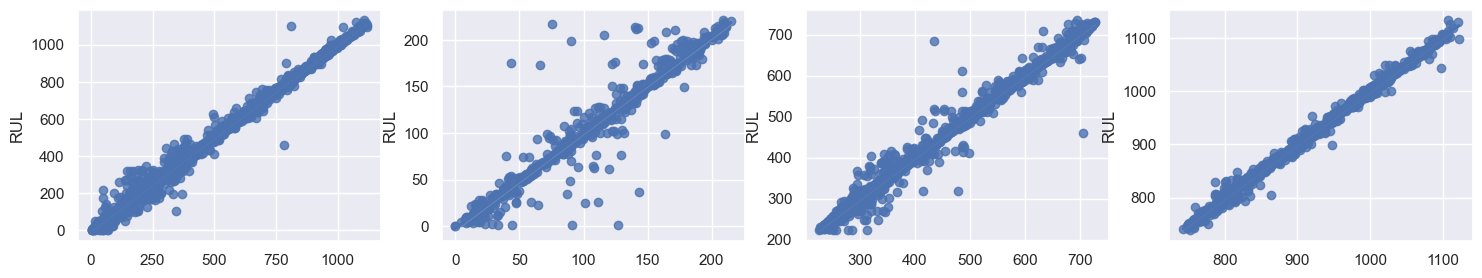

In [42]:
fig, ax = plt.subplots(ncols=4,figsize=(18, 3))

sns.regplot(x = rfr_pred, y = y_test, ax=ax[0])
sns.regplot(x = rfr_pred_1st, y = y_test_1st, ax=ax[1])
sns.regplot(x = rfr_pred_2nd, y = y_test_2nd, ax=ax[2])
sns.regplot(x = rfr_pred_3rd, y = y_test_3rd, ax=ax[3])

plt.show()

# 7. feature importance

Text(0.5, 0, 'Random Forest Feature Importance')

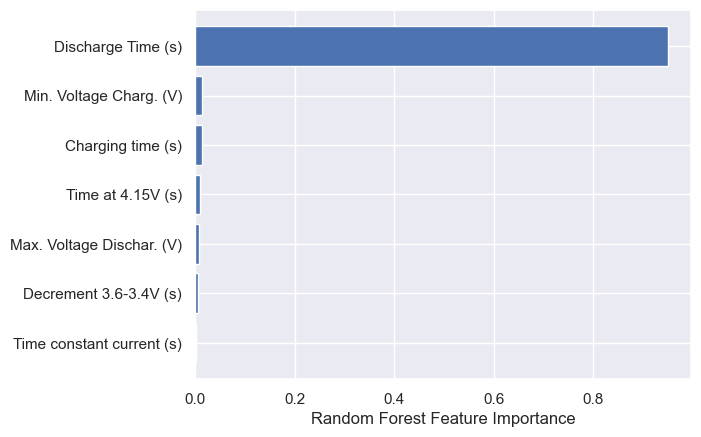

In [43]:
rfr.feature_importances_
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 8. model-2, BaggingRegressor comparison

In [44]:
# whole data
br = BaggingRegressor(random_state=2404)

br.fit(X_train, y_train)
print(br.score(X_train, y_train))
print(br.score(X_test, y_test))

br_pred = br.predict(X_test)
br_rmse = np.sqrt(mean_squared_error(y_test, br_pred))
print(br_rmse)

0.9988618236830484
0.9941735117509489
24.466558832859274


In [45]:
# 1. divided data - feature_1st

br.fit(X_train_1st, y_train_1st)
print(br.score(X_train_1st, y_train_1st))
print(br.score(X_test_1st, y_test_1st))

br_pred_1st = br.predict(X_test_1st)
br_rmse_1st = np.sqrt(mean_squared_error(y_test_1st, br_pred_1st))
print(br_rmse_1st)

0.9816595797460002
0.9134657325870287
18.510905419482135


In [46]:
# 2. divided data - feature_2nd

br.fit(X_train_2nd, y_train_2nd)
print(br.score(X_train_2nd, y_train_2nd))
print(br.score(X_test_2nd, y_test_2nd))

br_pred_2nd = br.predict(X_test_2nd)
br_rmse_2nd = np.sqrt(mean_squared_error(y_test_2nd, br_pred_2nd))
print(br_rmse_2nd)

0.9966216467687754
0.9794674433025707
20.821893396238405


In [47]:
# 3. divided data - feature_3rd

br.fit(X_train_3rd, y_train_3rd)
print(br.score(X_train_3rd, y_train_3rd))
print(br.score(X_test_3rd, y_test_3rd))

br_pred_3rd = br.predict(X_test_3rd)
br_rmse_3rd = np.sqrt(mean_squared_error(y_test_3rd, br_pred_3rd))
print(br_rmse_3rd)

0.9984563799129318
0.99379398452157
8.28039298778763


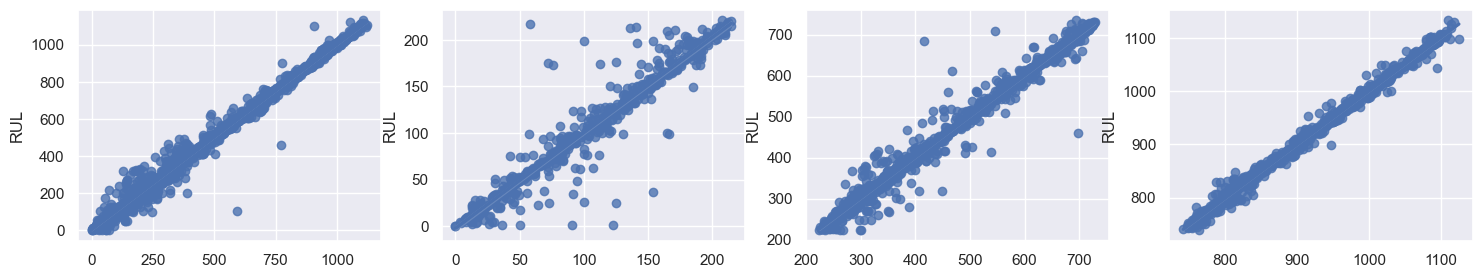

In [48]:
fig, ax = plt.subplots(ncols=4,figsize=(18, 3))

sns.regplot(x = br_pred, y = y_test, ax=ax[0])
sns.regplot(x = br_pred_1st, y = y_test_1st, ax=ax[1])
sns.regplot(x = br_pred_2nd, y = y_test_2nd, ax=ax[2])
sns.regplot(x = br_pred_3rd, y = y_test_3rd, ax=ax[3])

plt.show()

# 9. model-3, DecisionTreeRegressor Comparison

In [49]:
# whole data
dtr = DecisionTreeRegressor(random_state=2404)
dtr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

dtr_pred = dtr.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
print(dtr_rmse)

0.9999999530394339
0.9904929235900327
31.25308879524197


In [50]:
# 1. divided data - feature_1st

dtr.fit(X_train_1st, y_train_1st)
print(dtr.score(X_train_1st, y_train_1st))
print(dtr.score(X_test_1st, y_test_1st))

dtr_pred_1st = dtr.predict(X_test_1st)
dtr_rmse_1st = np.sqrt(mean_squared_error(y_test_1st, br_pred_1st))
print(dtr_rmse_1st)

0.9999999484932185
0.8134665165052584
18.510905419482135


In [51]:
# 2. divided data - feature_2nd

dtr.fit(X_train_2nd, y_train_2nd)
print(dtr.score(X_train_2nd, y_train_2nd))
print(dtr.score(X_test_2nd, y_test_2nd))

dtr_pred_2nd = dtr.predict(X_test_2nd)
dtr_rmse_2nd = np.sqrt(mean_squared_error(y_test_2nd, dtr_pred_2nd))
print(dtr_rmse_2nd)

1.0
0.9708578901944619
24.80614045587396


In [52]:
# 3. divided data - feature_3rd

dtr.fit(X_train_3rd, y_train_3rd)
print(dtr.score(X_train_3rd, y_train_3rd))
print(dtr.score(X_test_3rd, y_test_3rd))

dtr_pred_3rd = dtr.predict(X_test_3rd)
dtr_rmse_3rd = np.sqrt(mean_squared_error(y_test_3rd, dtr_pred_3rd))
print(dtr_rmse_3rd)

0.9999973119505317
0.989804026569477
10.613505987240956


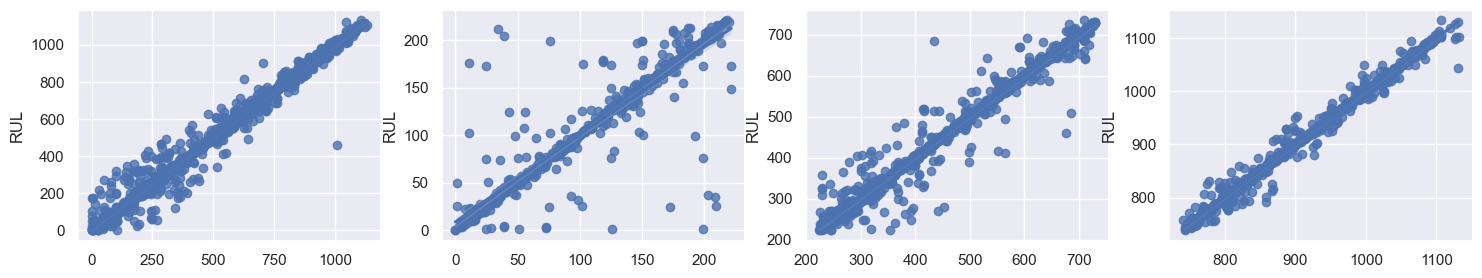

In [53]:
fig, ax = plt.subplots(ncols=4,figsize=(18, 3))

sns.regplot(x = dtr_pred, y = y_test, ax=ax[0])
sns.regplot(x = dtr_pred_1st, y = y_test_1st, ax=ax[1])
sns.regplot(x = dtr_pred_2nd, y = y_test_2nd, ax=ax[2])
sns.regplot(x = dtr_pred_3rd, y = y_test_3rd, ax=ax[3])

plt.show()

# 10. weight balanced Model

In [54]:
whole_preds = rfr_pred*6/10 + br_pred*3/10 + dtr_pred*1/10
whole_rmse = np.sqrt(mean_squared_error(y_test, whole_preds))
whole_rmse
# 22.64079703573876

22.64079703573876

In [55]:
preds_1st = rfr_pred_1st*6/10 + br_pred_1st*3/10 + dtr_pred_1st*1/10
rmse_1st = np.sqrt(mean_squared_error(y_test_1st, preds_1st))

preds_2nd = rfr_pred_2nd*6/10 + br_pred_2nd*3/10 + dtr_pred_2nd*1/10
rmse_2nd = np.sqrt(mean_squared_error(y_test_2nd, preds_2nd))

preds_3rd = rfr_pred_3rd*6/10 + br_pred_3rd*3/10 + dtr_pred_3rd*1/10
rmse_3rd = np.sqrt(mean_squared_error(y_test_3rd, preds_3rd))

print(rmse_1st, rmse_2nd, rmse_3rd)

18.509903673404157 19.319164573667788 7.603620908077932


In [56]:
preds_1st_df = pd.DataFrame({'preds':(preds_1st), 'y_test':y_test_1st})
preds_2nd_df = pd.DataFrame({'preds':(preds_2nd), 'y_test':y_test_2nd})
preds_3rd_df = pd.DataFrame({'preds':(preds_3rd), 'y_test':y_test_3rd})
print(preds_1st_df.shape, preds_2nd_df.shape, preds_3rd_df.shape)
preds_1st_df.head()

(608, 2) (1390, 2) (1017, 2)


,preds,y_test
2120,37.256,34
11680,189.870,184
1955,91.912,199
3186,43.032,45
4269,39.192,43


In [57]:
preds_123_df = pd.concat([preds_1st_df, preds_2nd_df, preds_3rd_df], axis=0).sort_index(ascending=True)
print(preds_123_df.shape)
preds_123_df.head()

(3015, 2)


,preds,y_test
6,1099.668,1105
7,1099.618,1104
8,1099.494,1103
25,1085.746,1086
35,1073.324,1076


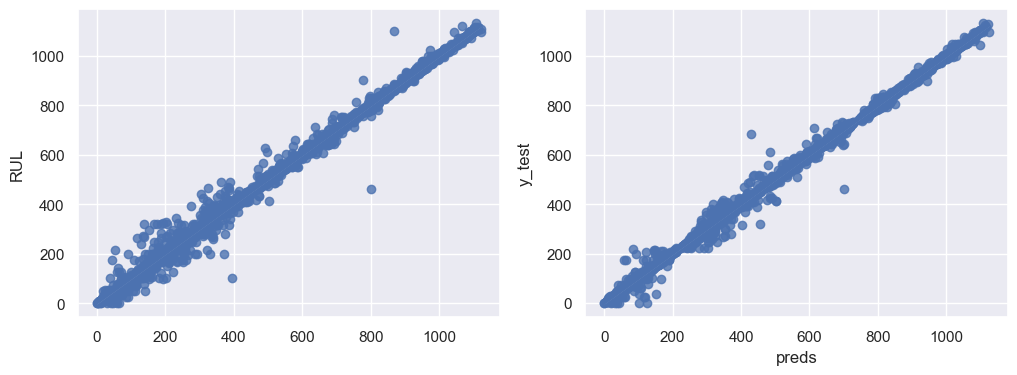

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

sns.regplot(x = whole_preds, y = y_test, ax=ax[0])
sns.regplot(x = preds_123_df['preds'], y = preds_123_df['y_test'], ax=ax[1])

plt.show()

# 11. Stacking of whole data models

In [59]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_f_n, y_train_f_n, X_test_n, n_folds):
    
    kf = KFold(n_splits = n_folds, shuffle = True, random_state=2301)
    
    train_fold_pred = np.zeros((X_train_f_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__, 'model start')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_f_n)):
        
        print('\t fold set: ', folder_counter, 'start')
        X_tr = X_train_f_n[train_index]
        y_tr = y_train_f_n[train_index]
        X_te = X_train_f_n[valid_index]
        
        model.fit(X_tr, y_tr)
        
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        test_pred[:, folder_counter] = model.predict(X_test_n)
    
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [60]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    
    kf = KFold(n_splits = n_folds, shuffle = True, random_state=2404)
    
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__, 'model start')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        
        print('\t fold set: ', folder_counter, 'start')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr, y_tr)
        
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        test_pred[:, folder_counter] = model.predict(X_test_n)
    
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [61]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

rfr_train, rfr_test = get_stacking_base_datasets(rfr, X_train_n, y_train_n, X_test_n, 10)
br_train, br_test = get_stacking_base_datasets(br, X_train_n, y_train_n, X_test_n, 10)
dtr_train, dtr_test = get_stacking_base_datasets(dtr, X_train_n, y_train_n, X_test_n, 10) 

RandomForestRegressor model start
	 fold set:  0 start
	 fold set:  1 start
	 fold set:  2 start
	 fold set:  3 start
	 fold set:  4 start
	 fold set:  5 start
	 fold set:  6 start
	 fold set:  7 start
	 fold set:  8 start
	 fold set:  9 start
BaggingRegressor model start
	 fold set:  0 start
	 fold set:  1 start
	 fold set:  2 start
	 fold set:  3 start
	 fold set:  4 start
	 fold set:  5 start
	 fold set:  6 start
	 fold set:  7 start
	 fold set:  8 start
	 fold set:  9 start
DecisionTreeRegressor model start
	 fold set:  0 start
	 fold set:  1 start
	 fold set:  2 start
	 fold set:  3 start
	 fold set:  4 start
	 fold set:  5 start
	 fold set:  6 start
	 fold set:  7 start
	 fold set:  8 start
	 fold set:  9 start


In [62]:
# stacking
Stack_final_X_train = np.concatenate((rfr_train, br_train, dtr_train), axis=1)
Stack_final_X_test = np.concatenate((rfr_test, br_test, dtr_test), axis=1)

# final meta model
from sklearn.linear_model import Lasso
meta_model_lasso = Lasso(alpha=0.0005, random_state=2404)

# final stacking model
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
rmse = np.sqrt(mean_squared_error(y_test, final))

print('RMSE of the final stacking model:', rmse)

# stacking rmse 22.816223769870685 vs wbm rmse 22.64079703573876
# to get the higher accuracy (lower rmse), add the other models in stacking process

RMSE of the final stacking model: 22.816223769870685
